In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 

In [3]:
sp500 = pd.read_csv('sp500_closefull.csv', index_col = 0, parse_dates = True)

sp500.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


In [5]:
sp500.shape

(2270, 480)

In [6]:
# drop any columns with 10 or more missing values 

sp500.dropna(axis = 1, thresh = len(sp500)-10, inplace = True)

In [7]:
sp500.shape

(2270, 430)

In [8]:
sp500.isna().sum().sum()

3011

In [9]:
# forward fill and backfill

sp500.fillna(method = 'ffill', inplace = True)

In [10]:
sp500.isna().sum().sum()

1

In [11]:
sp500.fillna(method = 'bfill', inplace = True)

In [12]:
sp500.isna().sum().sum()

0

In [13]:
all_dates = sp500.index.unique().sort_values()

start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2017-06-30')
dates = all_dates[start:end+1]


In [19]:
returns = np.log(sp500.pct_change()+1)

returns.dropna(axis=0, inplace=True)

In [20]:
returns

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149
2010-01-11,-0.002843,-0.016642,0.007025,0.007513,0.043001,0.027783,-0.013757,0.000000,-0.011921,0.028123,...,-0.017890,-0.006766,-0.025738,0.019735,-0.001645,0.026414,-0.010838,-0.002060,0.016150,0.012847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.038237,-0.029269,-0.021313,-0.025271,-0.014416,-0.015666,-0.043374,-0.060532,-0.034711,-0.029768,...,-0.001775,-0.012938,-0.040352,-0.017253,-0.017023,-0.030988,-0.049453,-0.012459,-0.020222,-0.028936
2018-12-26,0.052943,0.057467,0.053850,0.060428,0.108916,0.048053,0.079236,0.112680,0.065046,0.063320,...,0.067974,0.075461,0.038837,0.043138,0.035507,0.059517,0.052101,0.061923,0.052394,0.025762
2018-12-27,0.010307,-0.009111,0.018347,0.014441,-0.026894,0.007643,0.008332,0.008433,0.010173,0.003269,...,-0.002991,0.032780,0.014557,0.021782,0.010698,0.018477,-0.027340,0.005038,0.017087,0.001059


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X  = returns.to_numpy()

X = scaler.fit_transform(X)

X.shape


(2269, 430)

In [22]:
from sklearn.decomposition import PCA
model = PCA()

Z = model.fit_transform(X)

Z.shape

(2269, 430)

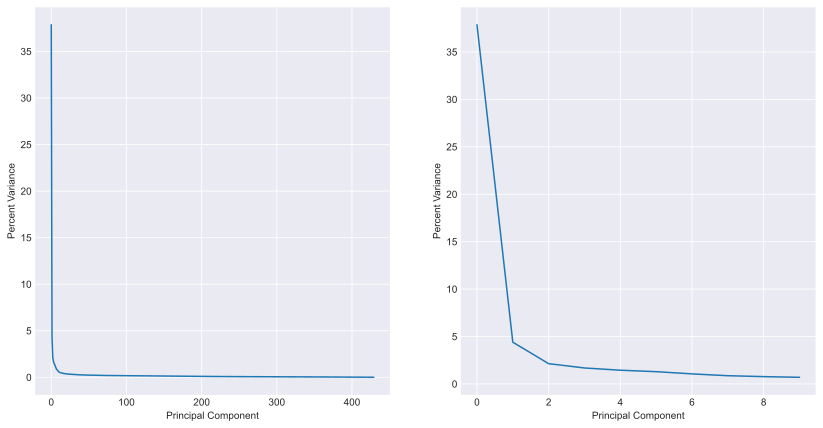

In [26]:
fig, axes = plt.subplots(1,2,figsize = (14,7))

axes[0].plot(model.explained_variance_ratio_ * 100)
axes[1].plot(model.explained_variance_ratio_[:10]* 100)


for i in range(2):
    axes[i].set_xlabel('Principal Component')
    axes[i].set_ylabel('Percent Variance')
    axes[i].grid()


Bulk of the variance is explained by the first few Principal Components! 

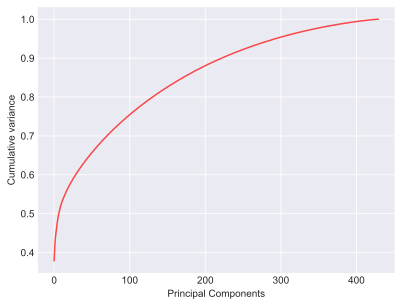

In [30]:
cum_var = np.cumsum(model.explained_variance_ratio_)


plt.plot(cum_var, alpha = 0.7, c = 'red')

plt.ylabel('Cumulative variance')
plt.xlabel('Principal Components')
plt.grid()

Step rise due to the principal component contributing approximately 40 percent of the variance! The other components have diminishing contributions to returns.  
This plot is in a sense give some credit to CAPM, according to which there is one most important influencial factor which is the market! 

In [31]:
# Plot first pricipal component vs S&P500

Z_df = pd.DataFrame(index = returns.index)

Z_df['PC1'] = Z[:,0]

In [32]:
spy = pd.read_csv('SPY.csv', index_col = 0, parse_dates = True)

<Axes: xlabel='Date'>

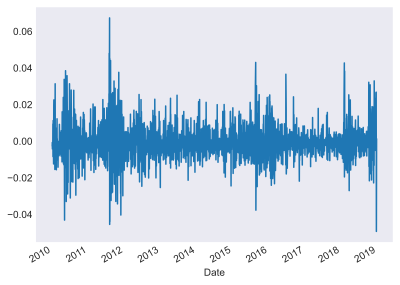

In [33]:
spy_returns = - np.log(spy['Close'].pct_change()+1).dropna()

spy_returns.plot()

In [34]:
# joined df 

joined = Z_df.join(spy_returns)

joined.head()

,PC1,Close
Date,,
2010-01-05,-3.082268,-0.002644
2010-01-06,-1.658736,-0.000704
2010-01-07,-7.838046,-0.004212
2010-01-08,-3.300012,-0.003322
2010-01-11,-3.664966,-0.001396


Notice that these values are not on the same scale. The first PC is obtained via rotation of the standardized stock returns. SPY on the other hand is the actual stock returns. 

In [35]:
joined.columns = ['PC1', 'SPY']

scaler2 = StandardScaler()

joined[['PC1', 'SPY']] = scaler2.fit_transform(joined)

 

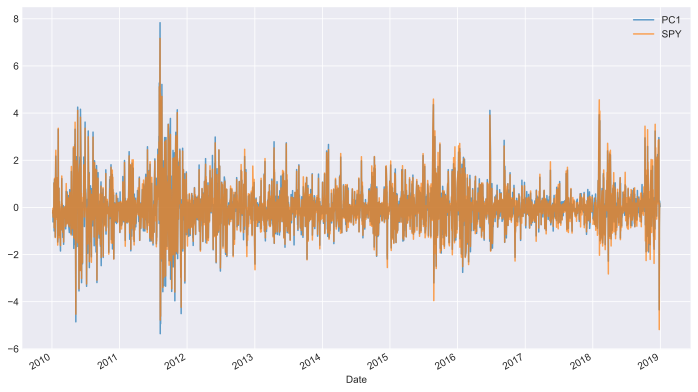

In [36]:
joined.plot(figsize = (12,7), alpha = 0.7)

plt.grid()